liron firuz 315794057

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
url="https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv"
data=pd.read_csv(url)

Q1

In [3]:
data.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [4]:
clear_data=data.dropna(subset =['Name', 'Team','Position','Age','Height','Weight','College','Salary']).copy()
clear_data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [5]:
clear_data_for_model=clear_data[['Age','Height','Weight','Salary']]
clear_data_for_model.head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


Q2

In [6]:
clear_data_for_model1=clear_data_for_model.copy()
clear_data_for_model1['Height'] = clear_data_for_model1['Height'].astype('category').cat.codes
clear_data_for_model1.head(3)

,Age,Height,Weight,Salary
0,25.0,6,180.0,7730337.0
1,25.0,10,235.0,6796117.0
3,22.0,9,185.0,1148640.0


Q3 - in my opinion, i think pie plot is more suitable to see the bigger picture. it think it is more clear to see data in percentage and as a part of the whole data.

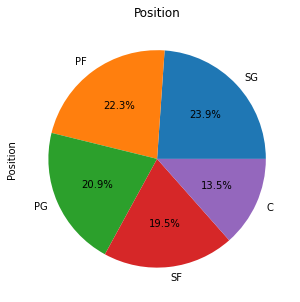

In [7]:
plt.figure(1, figsize=(5,5))
plt.title("Position")
clear_data['Position'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

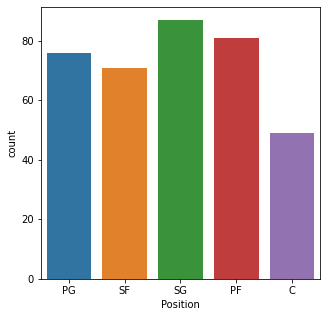

In [8]:
plt.figure(figsize=(5,5)) 
sns.countplot(x="Position", data=clear_data)

Q4

In [9]:
X = clear_data_for_model1[['Age','Height','Weight']]
y = clear_data_for_model1['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)  

X_train.head(5)

,Age,Height,Weight
42,28.0,12,235.0
111,29.0,16,270.0
309,26.0,9,201.0
135,23.0,12,260.0
201,28.0,4,235.0


In [10]:
y_test.head(5)

276    8500000.0
0      7730337.0
370    4375000.0
435    3075880.0
197    1007026.0
Name: Salary, dtype: float64

Q5 - i chose the Decision Tree Regressor model because i need to pridict sallary\price and not catagory.

In [11]:
model = DecisionTreeRegressor(random_state=9)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=9)

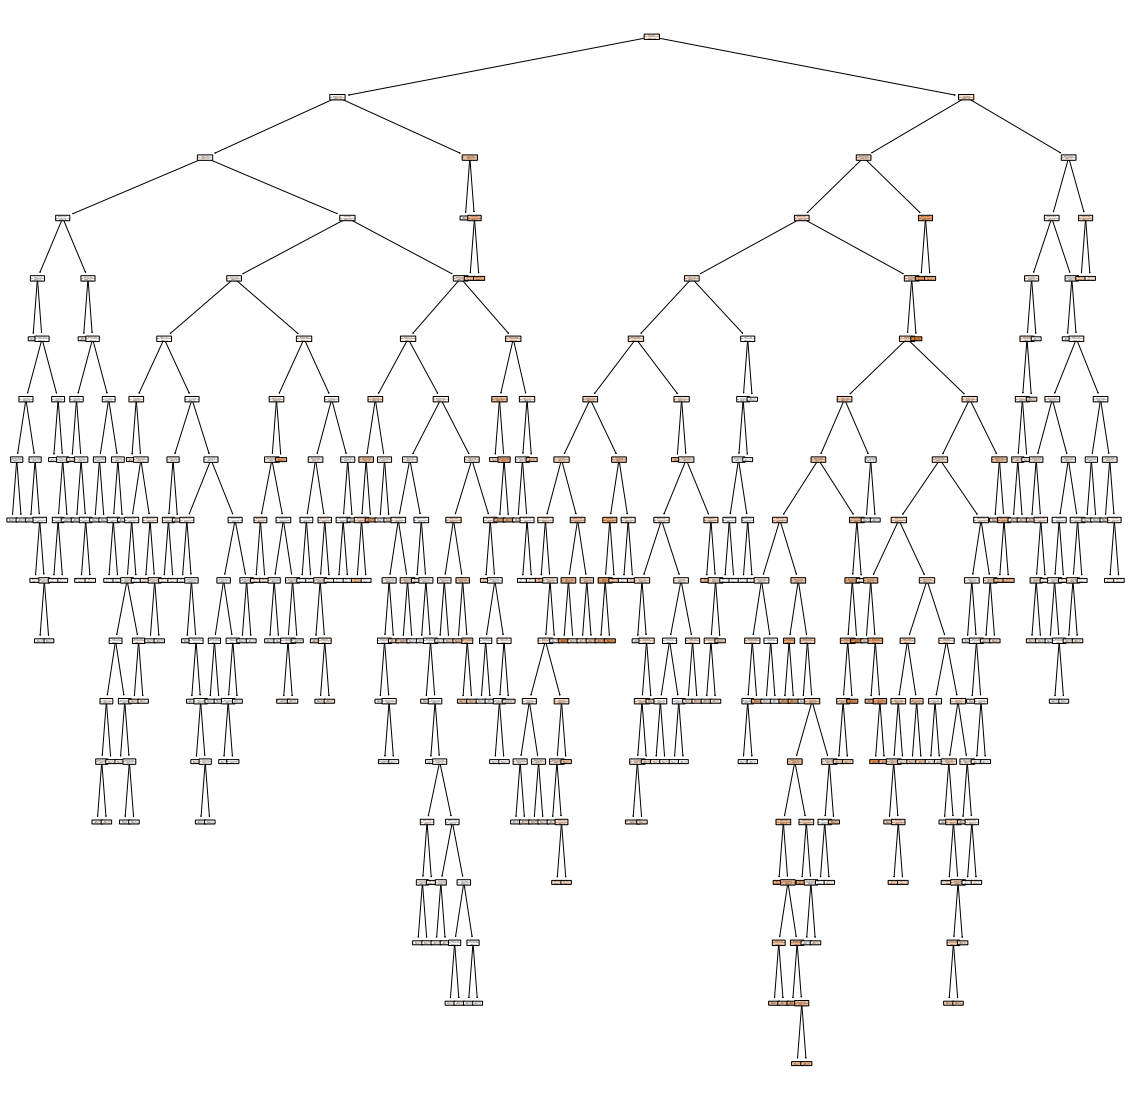

In [12]:
fig = plt.figure(figsize=(20,20))

tree.plot_tree(model, 
               feature_names = ['Age','Height','Weight'], 
               filled=True, 
               rounded = True)  
plt.show()

Q6

In [13]:
prediction = model.predict(X_test)

In [14]:
df = pd.DataFrame(columns = ['salary', 'predictions'])
df['salary'] = y_test
df = df.reset_index(drop=True)

In [15]:
df['predictions'] = pd.Series(prediction)
df.head()

,salary,predictions
0,8500000.0,4000000.0
1,7730337.0,1007026.0
2,4375000.0,1320000.0
3,3075880.0,11250000.0
4,1007026.0,845059.0


In [16]:
print("MSE: {:.3f}".format(mean_squared_error(prediction,y_test,squared=False)))

MSE: 8437993.738


Q7 - the model is better. MSE is lower then the original

In [17]:
clear_data_for_model2=clear_data[['Age','Height','Weight','Salary',"Position"]]
clear_data_for_model2_1=clear_data_for_model2.copy()
clear_data_for_model2_1['Height'] = clear_data_for_model2_1['Height'].astype('category').cat.codes
clear_data_for_model2_1['Position'] = clear_data_for_model2_1['Position'].astype('category').cat.codes
clear_data_for_model2_1

,Age,Height,Weight,Salary,Position
0,25.0,6,180.0,7730337.0,2
1,25.0,10,235.0,6796117.0,3
3,22.0,9,185.0,1148640.0,4
6,21.0,12,235.0,1170960.0,1
7,25.0,14,238.0,2165160.0,0
...,...,...,...,...,...
449,23.0,12,206.0,1348440.0,4
451,26.0,10,206.0,981348.0,3
452,20.0,4,234.0,2239800.0,1
453,26.0,7,203.0,2433333.0,2


In [18]:
X = clear_data_for_model2_1[['Age','Height','Weight','Position']]
y = clear_data_for_model2_1['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)  

In [19]:
model2 = DecisionTreeRegressor(random_state=10)
model2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

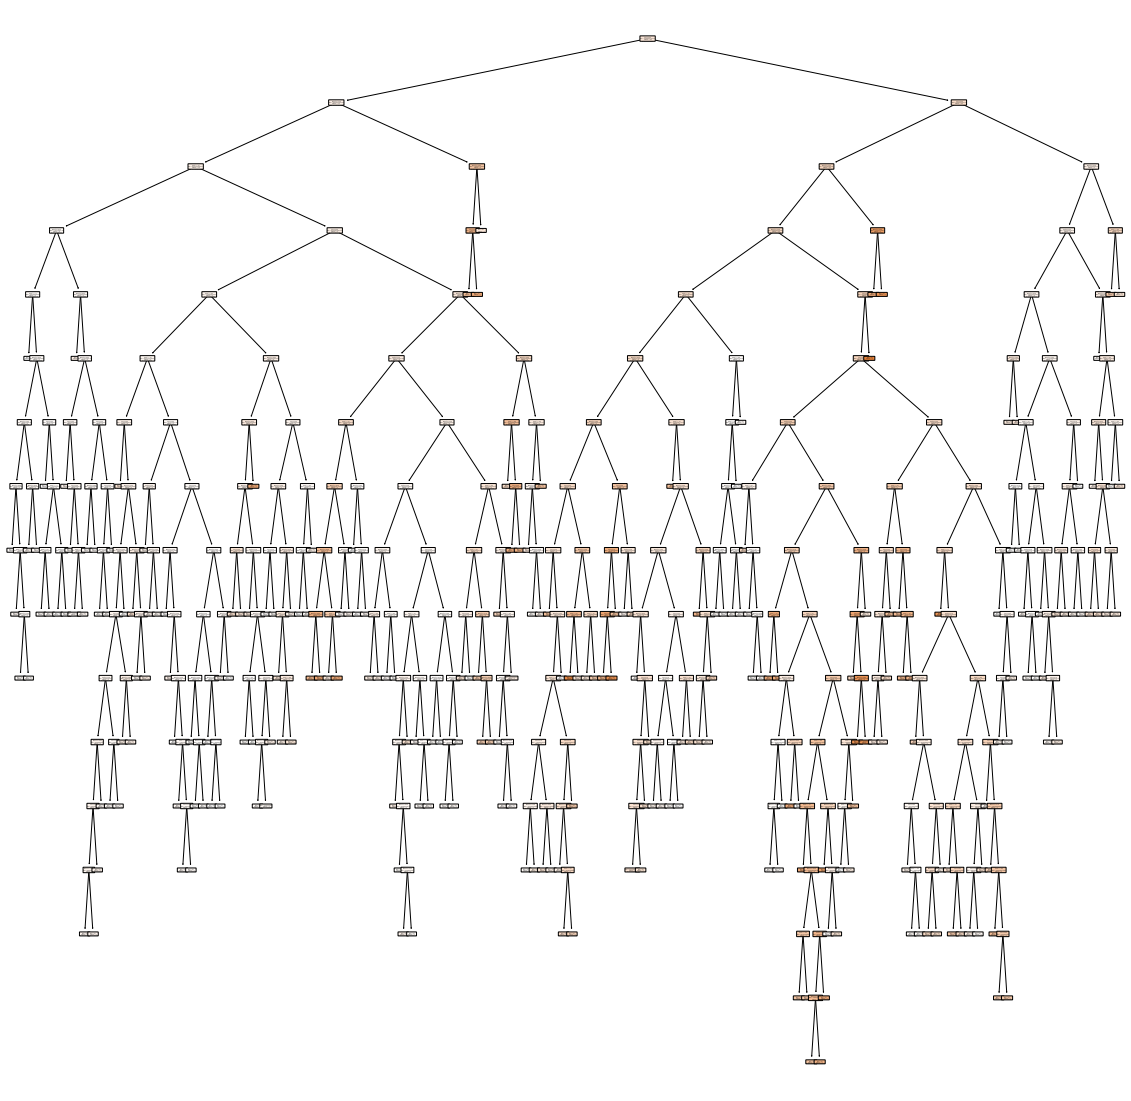

In [20]:
fig = plt.figure(figsize=(20,20))

tree.plot_tree(model2, 
               feature_names = ['Age','Height','Weight','Position'], 
               filled=True, 
               rounded = True)  
plt.show()

In [21]:
prediction2 = model2.predict(X_test)

In [22]:
df = pd.DataFrame(columns = ['salary', 'predictions'])
df['salary'] = y_test
df = df.reset_index(drop=True)

In [23]:
df['predictions'] = pd.Series(prediction2)
df.head()

,salary,predictions
0,8500000.0,19689000.0
1,7730337.0,1007026.0
2,4375000.0,1320000.0
3,3075880.0,11250000.0
4,1007026.0,845059.0


In [24]:
print("MSE: {:.3f}".format(mean_squared_error(prediction2,y_test,squared=False)))

MSE: 7890095.409


Q8

In [25]:
model3= DecisionTreeRegressor(max_depth=4,random_state=10)
model3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=10)

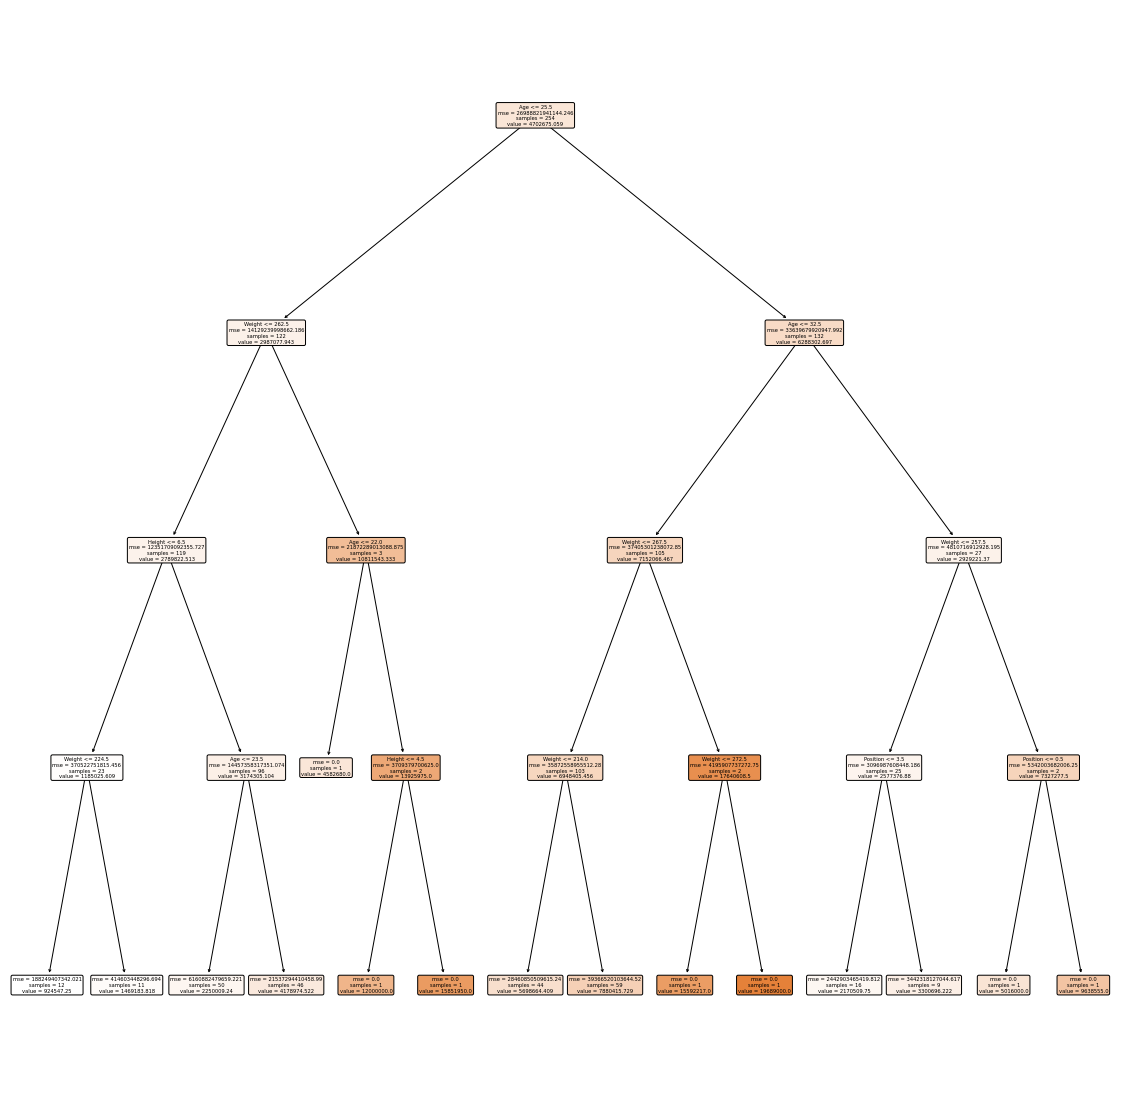

In [26]:
fig = plt.figure(figsize=(20,20))

tree.plot_tree(model3, 
               feature_names = ['Age','Height','Weight','Position'], 
               filled=True, 
               rounded = True)  
plt.show()

In [27]:
prediction3 = model3.predict(X_test)

In [28]:
df = pd.DataFrame(columns = ['salary', 'predictions'])
df['salary'] = y_test
df = df.reset_index(drop=True)

In [29]:
df['predictions'] = pd.Series(prediction3)
df.head()

,salary,predictions
0,8500000.0,7.880416e+06
1,7730337.0,9.245472e+05
2,4375000.0,7.880416e+06
3,3075880.0,4.178975e+06
4,1007026.0,4.178975e+06


In [30]:
print("MSE: {:.3f}".format(mean_squared_error(prediction3,y_test,squared=False)))

MSE: 5399049.713
